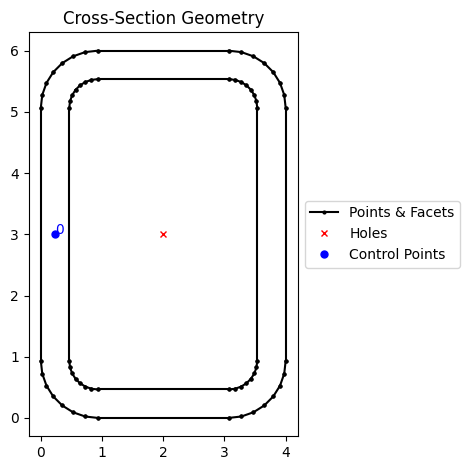

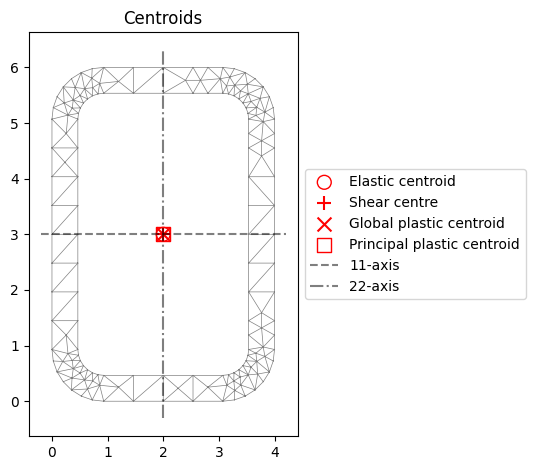

  Section Properties  
┏━━━━━━━━━━┳━━━━━━━━━┓
┃ Property ┃   Value ┃
┡━━━━━━━━━━╇━━━━━━━━━┩
│ A        │   7.861 │
│ Perim.   │  18.391 │
│ Qx       │  23.584 │
│ Qy       │  15.722 │
│ cx       │   2.000 │
│ cy       │   3.000 │
│ Ixx_g    │ 104.566 │
│ Iyy_g    │  49.140 │
│ Ixy_g    │  47.167 │
│ Ixx_c    │  33.815 │
│ Iyy_c    │  17.695 │
│ Ixy_c    │   0.000 │
│ Zxx+     │  11.272 │
│ Zxx-     │  11.272 │
│ Zyy+     │   8.848 │
│ Zyy-     │   8.848 │
│ rx       │   2.074 │
│ ry       │   1.500 │
│ phi      │   0.000 │
│ I11_c    │  33.815 │
│ I22_c    │  17.695 │
│ Z11+     │  11.272 │
│ Z11-     │  11.272 │
│ Z22+     │   8.848 │
│ Z22-     │   8.848 │
│ r11      │   2.074 │
│ r22      │   1.500 │
│ J        │  40.860 │
│ Iw       │   3.434 │
│ x_se     │   2.000 │
│ y_se     │   3.000 │
│ x_st     │   2.000 │
│ y_st     │   3.000 │
│ x1_se    │  -0.000 │
│ y2_se    │  -0.000 │
│ A_sx     │   2.538 │
│ A_sy     │   4.705 │
│ A_s11    │   2.538 │
│ A_s22    │   4.705 │
│ betax+   │  -0.000 │
│ betax-   │   0.000 │
│ betay+   │  -0.000 │
│ betay-   │   0.000 │
│ beta11+  │  -0.000 │
│ beta11-  │   0.000 │
│ beta22+  │  -0.000 │
│ beta22-  │   0.000 │
│ x_pc     │   2.000 │
│ y_pc     │   3.000 │
│ Sxx      │  14.603 │
│ Syy      │  10.959 │
│ SF_xx+   │   1.296 │
│ SF_xx-   │   1.296 │
│ SF_yy+   │   1.239 │
│ SF_yy-   │   1.239 │
│ x11_pc   │   2.000 │
│ y22_pc   │   3.000 │
│ S11      │  14.603 │
│ S22      │  10.959 │
│ SF_11+   │   1.296 │
│ SF_11-   │   1.296 │
│ SF_22+   │   1.239 │
│ SF_22-   │   1.239 │
└──────────┴─────────┘

In [14]:
import xlwings as xw
import sectionproperties.pre.library.steel_sections as sections
from sectionproperties.analysis.section import Section
import numpy as np
from datetime import datetime

if __name__ == "__main__":
    wb = xw.books.active
else:
    wb = xw.Book.caller()
    
sheet = wb.sheets['Box and HSS']

# Read the dimensions
width = sheet.range("B1").value
depth = sheet.range("B2").value
tft = sheet.range("B3").value
tfb = sheet.range("B4").value
tw = sheet.range("B5").value
rad = sheet.range("B6").value

# Check if the section is HSS or box, and create geometry
if rad == 0:
    geometry = sections.box_girder_section(depth, width, width, tft, tfb, tw)
else:
    geometry = sections.rectangular_hollow_section(width, depth, tw, rad, 8)

# Plot the geometry
geometry.plot_geometry()

#create mesh
geometry.create_mesh(mesh_sizes=[0.125])
section = Section(geometry)


#analyze
section.calculate_geometric_properties()
section.calculate_warping_properties()
section.calculate_plastic_properties()

#centroids
section.plot_centroids(filename="plot.png")
section.plot_centroids()

#results
#section.display_results(fmt='.3f')
results = np.array([["Ag",section.get_area()],
                    ["Qx",section.get_q()[0]],
                    ["Qy",section.get_q()[1]],
                    ["c top",depth-section.get_c()[1]],
                    ["c bottom",section.get_c()[1]],
                    ["Ix",section.get_ic()[0]],
                    ["Iy",section.get_ic()[1]],
                    ["Sx top",section.get_z()[0]],
                    ["Sx bottom",section.get_z()[1]],
                    ["Sy", section.get_z()[2]],
                    ["rx", section.get_rc()[0]],
                    ["ry", section.get_rc()[1]],
                    ["J", section.get_j()],
                    ["Cw", section.get_gamma()],
                    ["Zx", section.get_s()[0]],
                    ["Zy", section.get_s()[1]],
                    ["yp top", depth-section.get_pc()[1]],
                    ["yp bottom", section.get_pc()[1]]])

sheet.range("A20:B37").clear()
sheet.range("A20:B37").value = results

sheet.range("B19").clear()
now = datetime.now()
current_time = now.strftime("%Y-%m-%d %H:%M:%S")
sheet.range("B19").value = "Last Calculated " + current_time

section.display_results(fmt='.3f')


